<a href="https://colab.research.google.com/github/georginamihailova/Introduction-to-Data-Science/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

## Building the Neural Networks

Use the following dataset https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv to build three different neural networks using

> different layers


> activation functions


> number of neurons per layer


> number of layers











In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data pre-processing

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/vnp_exercises/laboratoriski/datasets/health_insurance.csv')

In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
data = data.drop('id',axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

In [ ]:
data['Vehicle_Age'] = encoder.fit_transform(data['Vehicle_Age'])

In [ ]:
data['Vehicle_Damage'] = encoder.fit_transform(data['Vehicle_Damage'])

In [ ]:
data['Gender'],data['Vehicle_Age'],data['Vehicle_Damage']

(0         1
 1         1
 2         1
 3         1
 4         0
          ..
 381104    1
 381105    1
 381106    1
 381107    0
 381108    1
 Name: Gender, Length: 381109, dtype: int64,
 0         2
 1         0
 2         2
 3         1
 4         1
          ..
 381104    0
 381105    1
 381106    1
 381107    2
 381108    0
 Name: Vehicle_Age, Length: 381109, dtype: int64,
 0         1
 1         0
 2         1
 3         0
 4         0
          ..
 381104    0
 381105    0
 381106    0
 381107    1
 381108    0
 Name: Vehicle_Damage, Length: 381109, dtype: int64)

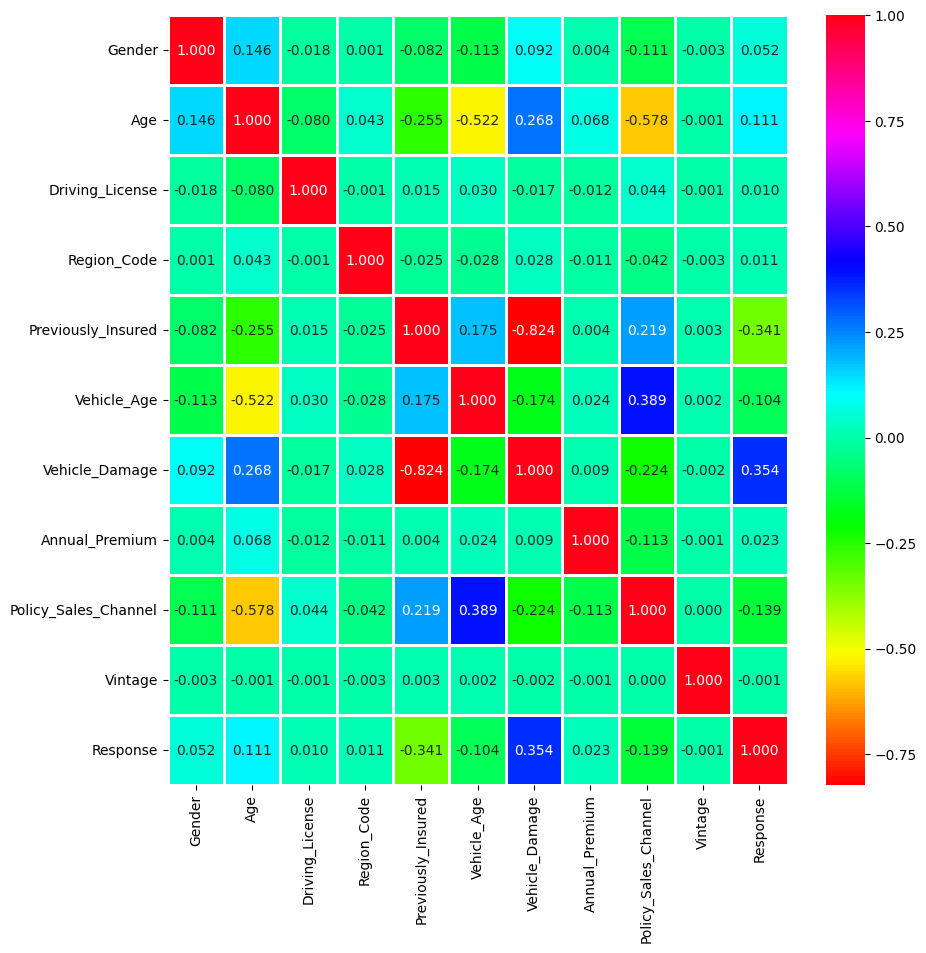

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Response'], axis = 1)
y = data.Response.values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(304887, 10)

In [ ]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Neural Network 1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model1 = Sequential()
model1.add(Dense(32, input_dim=10, kernel_initializer = 'uniform', activation='relu'))
model1.add(Dense(16,kernel_initializer = 'uniform', activation='relu'))
model1.add(Dense(16,kernel_initializer = 'uniform', activation='relu'))
model1.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Optimize number of epochs and batch size for NN1

In [ ]:
history_model1 = model1.fit(X_train, Y_train, epochs=15, batch_size=10, validation_data=(X_test, Y_test))


Epoch 1/15
30489/30489 [==============================] - 76s 3ms/step - loss: 0.2679 - accuracy: 0.8776 - val_loss: 0.2686 - val_accuracy: 0.8769
Epoch 2/15
30489/30489 [==============================] - 75s 2ms/step - loss: 0.2679 - accuracy: 0.8776 - val_loss: 0.2686 - val_accuracy: 0.8770
Epoch 3/15
30489/30489 [==============================] - 85s 3ms/step - loss: 0.2679 - accuracy: 0.8776 - val_loss: 0.2681 - val_accuracy: 0.8770
Epoch 4/15
30489/30489 [==============================] - 88s 3ms/step - loss: 0.2679 - accuracy: 0.8776 - val_loss: 0.2682 - val_accuracy: 0.8770
Epoch 5/15
30489/30489 [==============================] - 85s 3ms/step - loss: 0.2678 - accuracy: 0.8776 - val_loss: 0.2690 - val_accuracy: 0.8770
Epoch 6/15
30489/30489 [==============================] - 74s 2ms/step - loss: 0.2678 - accuracy: 0.8776 - val_loss: 0.2684 - val_accuracy: 0.8770
Epoch 7/15
30489/30489 [==============================] - 75s 2ms/step - loss: 0.2678 - accuracy: 0.8776 - val_loss: 0

In [ ]:
y_pred1 = model1.predict(X_test)

2382/2382 [==============================] - 4s 2ms/step


In [ ]:
y_pred1 = y_pred.round()

In [ ]:
y_pred1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

### Neural Network 2

In [ ]:
model2 = Sequential()
model2.add(Dense(64, input_dim=10, kernel_initializer='uniform', activation='relu'))
model2.add(Dropout(0.5))  # Adding dropout with a dropout rate of 0.5
model2.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model2.add(Dropout(0.5))  # Adding dropout with a dropout rate of 0.5
model2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Optimize number of epochs and batch size for NN2

In [ ]:
history_model2 = model2.fit(X_train, Y_train, epochs=20, batch_size=15, validation_data=(X_test, Y_test))


Epoch 1/20
20326/20326 [==============================] - 51s 2ms/step - loss: 0.2766 - accuracy: 0.8775 - val_loss: 0.2717 - val_accuracy: 0.8770
Epoch 2/20
20326/20326 [==============================] - 50s 2ms/step - loss: 0.2734 - accuracy: 0.8775 - val_loss: 0.2726 - val_accuracy: 0.8770
Epoch 3/20
20326/20326 [==============================] - 54s 3ms/step - loss: 0.2732 - accuracy: 0.8775 - val_loss: 0.2703 - val_accuracy: 0.8770
Epoch 4/20
20326/20326 [==============================] - 53s 3ms/step - loss: 0.2730 - accuracy: 0.8775 - val_loss: 0.2707 - val_accuracy: 0.8770
Epoch 5/20
20326/20326 [==============================] - 54s 3ms/step - loss: 0.2735 - accuracy: 0.8775 - val_loss: 0.2702 - val_accuracy: 0.8770
Epoch 6/20
20326/20326 [==============================] - 50s 2ms/step - loss: 0.2734 - accuracy: 0.8775 - val_loss: 0.2705 - val_accuracy: 0.8770
Epoch 7/20
20326/20326 [==============================] - 50s 2ms/step - loss: 0.2733 - accuracy: 0.8775 - val_loss: 0

In [ ]:
y_pred2 = model2.predict(X_test)

2382/2382 [==============================] - 15s 6ms/step


In [ ]:
y_pred2 = y_pred2.round()

In [ ]:
y_pred2

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

### Neural Network 3

In [ ]:
model3 = Sequential()
model3.add(Dense(128, input_dim=10, kernel_initializer='he_normal', activation='elu'))
model3.add(Dense(64, kernel_initializer='he_normal', activation='elu'))
model3.add(Dense(32, kernel_initializer='he_normal', activation='elu'))
model3.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Optimize number of epochs and batch size for NN3

In [ ]:
history_model3 = model3.fit(X_train, Y_train, epochs=25, batch_size=15, validation_data=(X_test, Y_test))


Epoch 1/25
20326/20326 [==============================] - 62s 3ms/step - loss: 0.2713 - accuracy: 0.8774 - val_loss: 0.2722 - val_accuracy: 0.8770
Epoch 2/25
20326/20326 [==============================] - 54s 3ms/step - loss: 0.2702 - accuracy: 0.8775 - val_loss: 0.2734 - val_accuracy: 0.8693
Epoch 3/25
20326/20326 [==============================] - 58s 3ms/step - loss: 0.2698 - accuracy: 0.8774 - val_loss: 0.2719 - val_accuracy: 0.8770
Epoch 4/25
20326/20326 [==============================] - 56s 3ms/step - loss: 0.2697 - accuracy: 0.8772 - val_loss: 0.2691 - val_accuracy: 0.8769
Epoch 5/25
20326/20326 [==============================] - 55s 3ms/step - loss: 0.2694 - accuracy: 0.8772 - val_loss: 0.2708 - val_accuracy: 0.8770
Epoch 6/25
20326/20326 [==============================] - 57s 3ms/step - loss: 0.2692 - accuracy: 0.8773 - val_loss: 0.2694 - val_accuracy: 0.8756
Epoch 7/25
20326/20326 [==============================] - 60s 3ms/step - loss: 0.2692 - accuracy: 0.8773 - val_loss: 0

In [ ]:
y_pred3 = model3.predict(X_test)

2382/2382 [==============================] - 3s 1ms/step


In [ ]:
y_pred3 = y_pred3.round()

In [ ]:
y_pred3

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

### Evaluate the three NNs

In [ ]:
loss_model1, accuracy_model1 = model1.evaluate(X_test, Y_test)
print(f"Model 1 - Loss: {loss_model1}, Accuracy: {accuracy_model1}")

loss_model2, accuracy_model2 = model2.evaluate(X_test, Y_test)
print(f"Model 2 - Loss: {loss_model2}, Accuracy: {accuracy_model2}")

loss_model3, accuracy_model3 = model3.evaluate(X_test, Y_test)
print(f"Model 3 - Loss: {loss_model3}, Accuracy: {accuracy_model3}")

2382/2382 [==============================] - 6s 2ms/step - loss: 0.2686 - accuracy: 0.8770
Model 1 - Loss: 0.26859575510025024, Accuracy: 0.876977801322937
2382/2382 [==============================] - 4s 2ms/step - loss: 0.2750 - accuracy: 0.8770
Model 2 - Loss: 0.27504900097846985, Accuracy: 0.8769909143447876
2382/2382 [==============================] - 4s 2ms/step - loss: 0.2684 - accuracy: 0.8768
Model 3 - Loss: 0.2683508098125458, Accuracy: 0.8767547607421875


## Results analysis

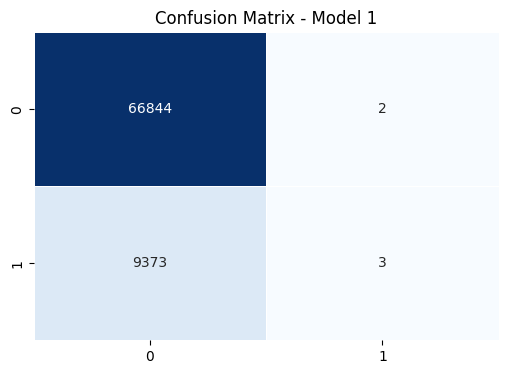

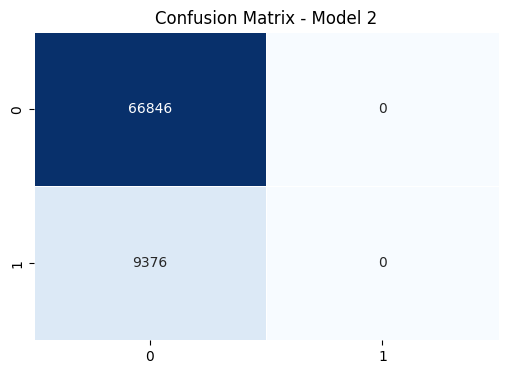

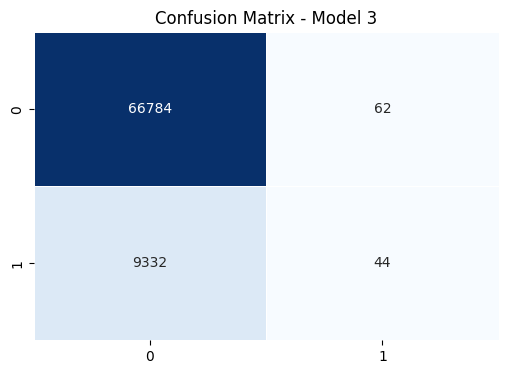

In [ ]:
cm_model1 = confusion_matrix(Y_test, y_pred1)
cm_model2 = confusion_matrix(Y_test, y_pred2)
cm_model3 = confusion_matrix(Y_test, y_pred3)

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(cm_model1, 'Model 1')
plot_confusion_matrix(cm_model2, 'Model 2')
plot_confusion_matrix(cm_model3, 'Model 3')